The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption()

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns


In [152]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [154]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<Axes: >

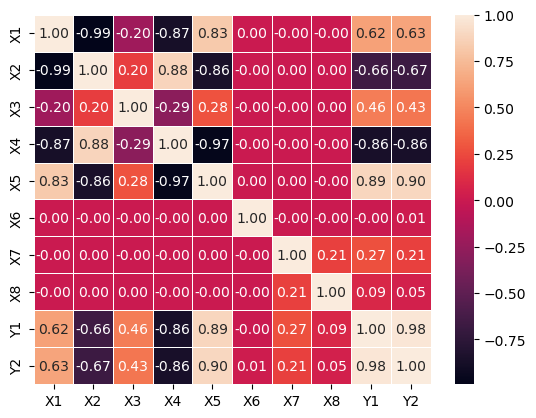

In [155]:
corr=df.corr()
sns.heatmap(corr,linewidths=0.5,annot=True,fmt='.2f')


<Axes: >

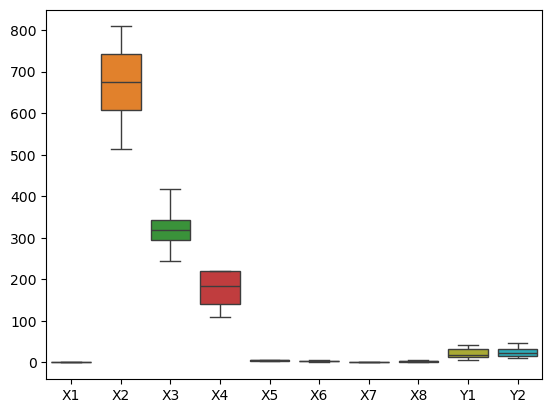

In [156]:
sns.boxplot(df)

No outliers are detected

(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [159]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Y1','Y2'])
y=df["Y1"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [161]:
def linear_regression(x_train ,  y_train):
    
    x_train_b =  np.c_[np.ones(x_train.shape[0]), x_train]
    theta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
    return theta

theta_manual = linear_regression(x_train, y_train)
print(theta_manual)

[ 1.50491929e+04 -1.36371681e+04  8.56301471e+01 -9.18560448e+01
 -1.94245242e+02  4.10805188e+00 -6.17734841e-02  2.06965060e+01
  2.32368954e-01]


In [162]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)
print(l.intercept_)
print(l.coef_)

84.49413691329595
[-6.47978032e+01 -6.31271420e-02  3.63461880e-02 -4.97366650e-02
  4.10805189e+00 -6.17734840e-02  2.06965060e+01  2.32368954e-01]


In [163]:
from sklearn.linear_model import Ridge
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print(lasso.intercept_)
print(lasso.coef_)

-25.556695806866898
[-0.00000000e+00  3.69970767e-03  4.81124719e-02 -0.00000000e+00
  4.87418220e+00 -0.00000000e+00  1.49310878e+01  3.07202087e-01]


In [164]:
from sklearn.linear_model import Ridge
ridge=Lasso(alpha=0.1)
ridge.fit(x_train,y_train)
print(ridge.intercept_)
print(ridge.coef_)

-25.556695806866898
[-0.00000000e+00  3.69970767e-03  4.81124719e-02 -0.00000000e+00
  4.87418220e+00 -0.00000000e+00  1.49310878e+01  3.07202087e-01]


(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models

In [166]:
y_pred_manual = np.c_[np.ones(x_test.shape[0]), x_test].dot(theta_manual)
y_pred_sklearn = l.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)

In [167]:
from sklearn.metrics import r2_score, mean_squared_error
def calculate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

In [168]:

r2_manual, mse_manual, rmse_manual = calculate(y_test, y_pred_manual)

r2_sklearn, mse_sklearn, rmse_sklearn  = calculate(y_test, y_pred_sklearn)
r2_ridge, mse_ridge, rmse_ridge  = calculate(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso  = calculate(y_test, y_pred_lasso)


print(f"Manual Linear Regression: R²={r2_manual:.4f}, MSE={mse_manual:.4f}, RMSE={rmse_manual:.4f} ")
print(f"Sklearn Linear Regression: R²={r2_sklearn:.4f}, MSE={mse_sklearn:.4f}, RMSE={rmse_sklearn:.4f}")
print(f"Ridge Regression: R²={r2_ridge:.4f}, MSE={mse_ridge:.4f}, RMSE={rmse_ridge:.4f} ")
print(f"Lasso Regression: R²={r2_lasso:.4f}, MSE={mse_lasso:.4f}, RMSE={rmse_lasso:.4f} ")

Manual Linear Regression: R²=-20406.3787, MSE=2239159.0936, RMSE=1496.3820 
Sklearn Linear Regression: R²=0.9205, MSE=8.7280, RMSE=2.9543
Ridge Regression: R²=0.9177, MSE=9.0355, RMSE=3.0059 
Lasso Regression: R²=0.9177, MSE=9.0355, RMSE=3.0059 


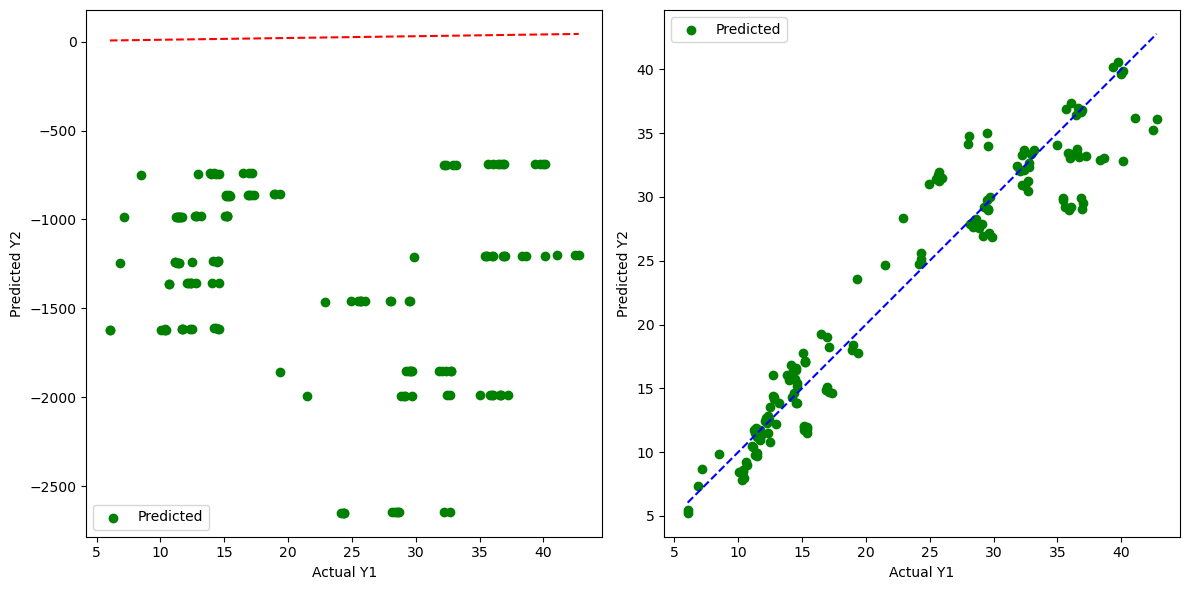

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_manual, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")

plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sklearn, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')
plt.xlabel("Actual Y1")
plt.ylabel("Predicted Y2")

plt.legend()

plt.tight_layout()
plt.show()

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.